In [63]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
import numpy as np

In [89]:
cancer = load_digits(return_X_y=True)

In [90]:
X, y = cancer

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [92]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/penguix/Documents/ML/my_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
log_reg.score(X_test, y_test)

0.9711111111111111

In [94]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [95]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=45)),
    ("log_reg", LogisticRegression())
    ])
pipeline.fit(X_train, y_train)

/home/penguix/Documents/ML/my_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=45)),
                ('log_reg', LogisticRegression())])

In [96]:
pipeline.score(X_test, y_test)

0.9555555555555556

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = dict(kmeans__n_clusters=range(90,130))
grid_search = GridSearchCV(pipeline, param_grid=grid_params, cv=3, verbose=2)
grid_search.fit(X_train, y_train)

In [99]:
grid_search.best_estimator_

Pipeline(steps=[('kmeans', KMeans(n_clusters=111)),
                ('log_reg', LogisticRegression())])

In [114]:
test = np.array([1,2,3,2,1,2,2])
go = np.array([1,2,3,4,5,6,7,2,1,2,3,4])
for i in range(3):
    go[go == i+1] = 100

In [109]:
test == 2

array([False,  True, False,  True, False,  True,  True])

In [1]:
go

NameError: name 'go' is not defined

CHAPTER 9 EXERCIES:

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [6]:
olivetti = fetch_olivetti_faces(return_X_y=True)
olivetti 

(array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
         8,  8

In [7]:
X, y = olivetti

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
kmeans = KMeans(n_clusters=40, random_state=42)

In [16]:
y_pred = kmeans.fit_predict(X_train)

In [22]:
y_pred[:10]

array([38, 21, 16, 21, 21,  9,  8,  9, 38,  8], dtype=int32)

In [23]:
y_train[:10]

array([11, 34, 20, 34, 16, 38, 12, 28, 37, 19])

In [29]:
from timeit import timeit

In [55]:
times = np.empty((100,1))
inertias = np.empty((100,1))

for k in range(102,120):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100, end=""))
    times[k-1] = timeit("kmeans_.fit(X_train)", number=10, globals=globals())
    inertias[k-1] = kmeans_.inertia_

102/100


KeyboardInterrupt: 

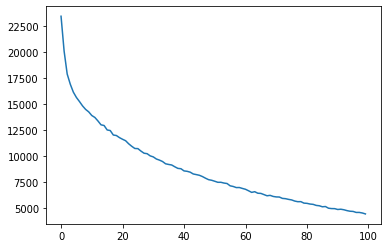

In [54]:
fig, ax = plt.subplots()
ax.plot(inertias)

In [87]:


from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca.n_components_


210

In [88]:
k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


In [84]:
fig, ax = plt.subplots()
ax.plot(inertias)

6912.74462890625

In [85]:
silhouette_score(X_train, kmeans.labels_)

0.16419001

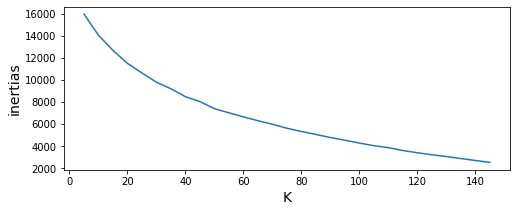

In [107]:
plt.figure(figsize=(8,3))
plt.xlabel("K", fontsize=14)
plt.ylabel("inertias", fontsize=14)
plt.plot(k_range,[kmeans_per_k[i].inertia_ for i in range(len(kmeans_per_k))])
plt.show()

20


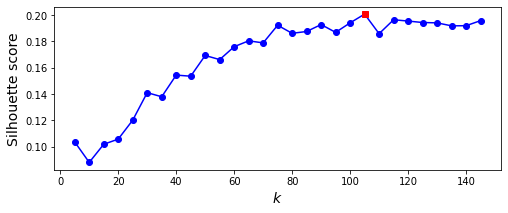

In [100]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)

best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [110]:
best_model =  kmeans_per_k[best_index]

105

In [111]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64);
    n_rows = (len(faces)-1)//n_cols+1;
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.sublot(n_rows, n_cols, index°1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
for cluster_id in np.unique(best)